# Sentiment Analysis of *The Times* Music Reviews
## Part II: Corpus Analysis and Summarization
*How have artforms been reported?  Is there a status hierarchy between them?  How has this changed over time?*

* **Project:** What counts as culture?  Reporting and criticism in The Times 1785-2000
* **Project Lead:** Dave O'Brien
* **Developer:** Lucy Havens
* **Funding:** from the Centre for Data, Culture & Society, University of Edinburgh
* **Dataset:** 83,625 reviews about music published in The Times from 1950 through 2009

Begun March 2021

Let's summarize our corpus and visualize the results so we can get an overview of the data we're working with.

In [1]:
# for data loading analysis
import re
import string
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import altair as alt   ###  Need to figure out why Altair returns error! (Javascript Error: Unrecognized transform type: "formula")
import seaborn as sns

# for text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
# nltk.download('wordnet')
from nltk.corpus import wordnet
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text

## 1. Text Analysis
We'll begin by determining the number of words and sentences per article so we can study the change in article lenghts over time and by genre.

**Step 1:** Split the running text of the music reviews into words and sentences.

In [2]:
data_path = "../TheTimes_DaveO/TheTimesMusicReviews_1950-2009"
articles = PlaintextCorpusReader(data_path, ".+/.+", encoding='utf-8')

In [3]:
fileids = articles.fileids()
tokens = []
for fileid in fileids:
    tokens += [word_tokenize(articles.raw(fileid))]
print("Sample of Tokens (strings of characters estimated to be words):\n", tokens[0][0:15])

Sample of Tokens (strings of characters estimated to be words):
 ["'SOME", 'NEW', 'SCORES', 'MOTET', 'AND', 'OPERA', 'BY', 'OUR', 'MUSIC', 'CRIrIC', 'Music', 'publishing', 'has', 'got', 'into']


In [4]:
# for fileid in fileids:
#     article_tokens = tokens.fileid(fileid)
#     # Create a list of all the alphabetic tokens in the music reviews so that we can 
#     # count the number of words per music review
#     alpha_tokens = [t for t in article_tokens if t.isalpha()]
#     # Create a list of all the alphabetic tokens (words) and numbers in the music reviews
#     # so that we can count the words, numbers and dates per music review
#     alphanum_tokens = [t for t in article_tokens if t.isalnum()]


# print("Sample of Words:\n", alpha_tokens[100][100:115])
# print("\nSample of Alphanumeric Tokens (words, numbers, dates):\n", alphanum_tokens[20][1000:1015])

In [5]:
sentences = []
for fileid in fileids:
    sentences += [sent_tokenize(articles.raw(fileid))]
print("Sample sentence:", sentences[0][10])

Sample sentence: Its score, apparently enlarged by photographic process from Tudor Church Miusic by permission of the Carnegie Trust, is issued by the Oxford University Press at the remarkable price of 3s.


**Step 2:** Now that we have split the running text of the articles into words and sentences, let's count the number of words and sentences per article.

In [6]:
def countPerArticle(article_list):
    lengths_list = []
    for article in article_list:
        lengths_list += [len(article)]
    return lengths_list

tokens_per_article = countPerArticle(tokens)
sents_per_article = countPerArticle(sentences)

In [7]:
identifiers = []
for fileid in fileids:
    identifiers += [int(re.findall("\d{5,}",fileid)[0])]
print(identifiers[0])

20787


In [8]:
df_lengths = pd.DataFrame({"identifier":identifiers, "word_count":tokens_per_article, "sentence_count":sents_per_article})
df_lengths.head()

,identifier,word_count,sentence_count
0,20787,849,42
1,20788,367,14
2,20789,386,11
3,20790,383,8
4,20791,738,23


With this table we can quickly calculate the longest, shortest, and average lengths of music reviews.

In [9]:
print("Most Words:", max(df_lengths["word_count"]))
print("Fewest Words:", min(df_lengths["word_count"]))
print("Average Words:", np.mean(df_lengths["word_count"]))
print("Standard Deviation:", np.std(df_lengths["word_count"]))
print("\nMost Sentences:", max(df_lengths["sentence_count"]))
print("Fewest Sentences:", min(df_lengths["sentence_count"]))
print("Average Sentences:", np.mean(df_lengths["sentence_count"]))
print("Standard Deviation:", np.std(df_lengths["sentence_count"]))

Most Words: 12690
Fewest Words: 9
Average Words: 731.6872411225393
Standard Deviation: 696.9939277668024

Most Sentences: 867
Fewest Sentences: 1
Average Sentences: 28.741715921254713
Standard Deviation: 32.55556114908729


Nice!

Now we can write this table to a CSV for safekeeping.

In [10]:
df_lengths.to_csv("../TheTimes_DaveO/TheTimesArticlesLengths_1950-2009.csv")

**Step 3:** Lastly, let's visualize the table so we can get a broader overview of how the music reviews' lengths compare.  To do this, let's begin by joining up the lengths information with the inventory containing metadata for each music review.  Then, we can calculate lengths by genre, by year, and by author.

We'll load the inventory...

In [11]:
dfi = pd.read_csv("../TheTimes_DaveO/TheTimesArticles_1950-2009_Inventory.csv")
dfi.rename(columns={"Unnamed: 0":"identifier"}, inplace=True)
dfi.head()

,identifier,title,year,author,term,section,pages,filename,article_id,issue_id
0,20787,SOME NEW SCORES MOTET AND OPERA,1950,BY OUR MUSIC CRITIC,"[' bands', ' composer', ' musical', ' opera', ...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-023,0FFO-1950-JUN30
1,20788,"THE ROYAL OPERA "" TRISTAN AND ISOLDE """,1950,'',"[' opera', ' orchestra']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-027,0FFO-1950-JUN30
2,20789,GROWING TASTE FOR MUSIC PLEA FOR ENLARGED QUEE...,1950,'',[' country'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-032,0FFO-1950-JUN30
3,20790,ROYAL PHILHARMONIC CONCERT BEECHAM AND MOZART,1950,'',"[' orchestra', ' orchestras']",Reviews,['010'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR02-010-006,0FFO-1950-MAR02
4,20791,MUSICAL JOURNALS SOME NEWCOMERS,1950,BY OUR MUSIC CRITIC,"[' musical', ' orchestra', ' orchestras']",Reviews,['007'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR03-007-010,0FFO-1950-MAR03


...merge it with the lengths table...

In [12]:
df = dfi.merge(df_lengths, how="outer", on="identifier")
df.head()

,identifier,title,year,author,term,section,pages,filename,article_id,issue_id,word_count,sentence_count
0,20787,SOME NEW SCORES MOTET AND OPERA,1950,BY OUR MUSIC CRITIC,"[' bands', ' composer', ' musical', ' opera', ...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-023,0FFO-1950-JUN30,849,42
1,20788,"THE ROYAL OPERA "" TRISTAN AND ISOLDE """,1950,'',"[' opera', ' orchestra']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-027,0FFO-1950-JUN30,367,14
2,20789,GROWING TASTE FOR MUSIC PLEA FOR ENLARGED QUEE...,1950,'',[' country'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-032,0FFO-1950-JUN30,386,11
3,20790,ROYAL PHILHARMONIC CONCERT BEECHAM AND MOZART,1950,'',"[' orchestra', ' orchestras']",Reviews,['010'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR02-010-006,0FFO-1950-MAR02,383,8
4,20791,MUSICAL JOURNALS SOME NEWCOMERS,1950,BY OUR MUSIC CRITIC,"[' musical', ' orchestra', ' orchestras']",Reviews,['007'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR03-007-010,0FFO-1950-MAR03,738,23


...and then create subsets of the data to visualize!

## 2. Data Visualization

### 2.1 Average Length per Year**

In [13]:
df_yearly = pd.DataFrame({"year":list(df.year), "word_count":list(df.word_count), "sentence_count":list(df.sentence_count)})
df_yearly_grouped = df_yearly.groupby("year").mean().reset_index()
print(df_yearly_grouped.shape)
df_yearly_grouped.head()

(60, 3)


,year,word_count,sentence_count
0,1950,466.077778,14.808889
1,1951,512.378840,16.023891
2,1952,478.672554,15.716033
3,1953,523.531365,16.755228
4,1954,519.183673,16.771909


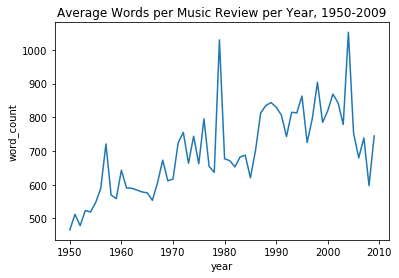

In [14]:
lengths_viz = sns.lineplot(data=df_yearly_grouped, x="year", y="word_count")
lengths_viz.set(title="Average Words per Music Review per Year, 1950-2009")  # ylim=(0.4,1),
lengths_viz.figure.savefig("yearly_avg_words_per_review.png")

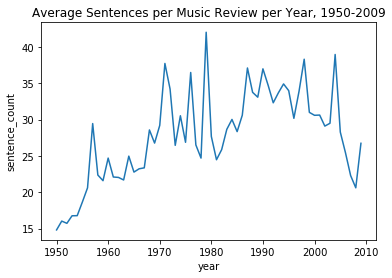

In [15]:
lengths_viz = sns.lineplot(data=df_yearly_grouped, x="year", y="sentence_count")
lengths_viz.set(title="Average Sentences per Music Review per Year, 1950-2009")  # ylim=(0.4,1),
lengths_viz.figure.savefig("yearly_avg_sentences_per_review.png")

**Articles per Year**

In [16]:
df_yearly2 = pd.DataFrame({"identifier":list(df.identifier), "year":list(df.year)})
df_yearly_count = df_yearly2.groupby("year").count().reset_index()
df_yearly_count.columns = ["year", "total_articles"]
df_yearly_count.tail()

,year,total_articles
55,2005,2643
56,2006,2476
57,2007,3516
58,2008,636
59,2009,2495


In [17]:
# Check that the counts were made as expected
df_test = df[df.year == 2005]
df_test.shape

(2643, 12)

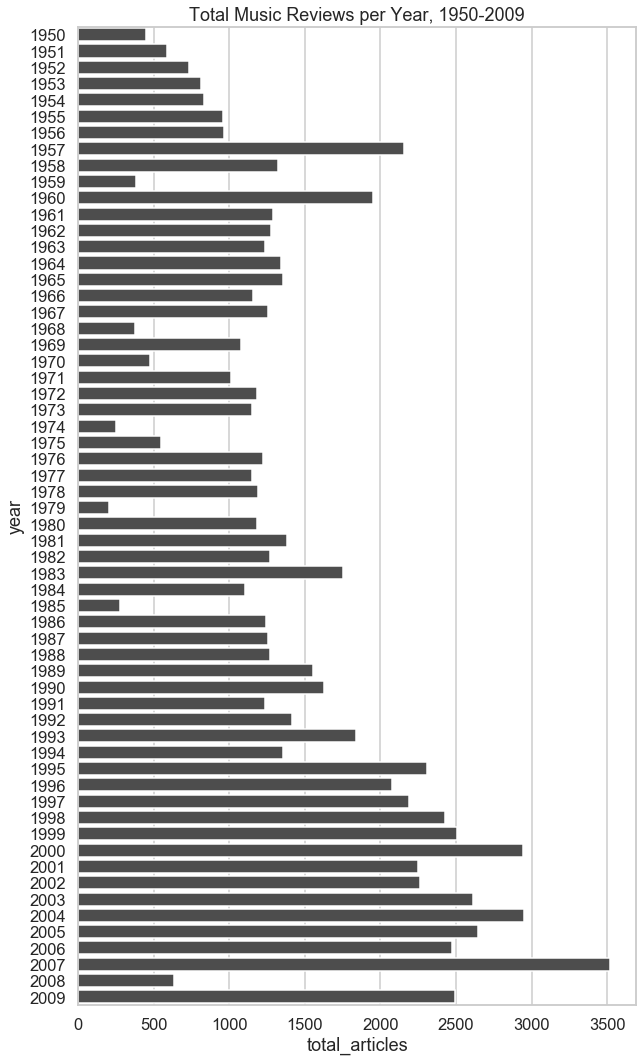

In [18]:
sns.set_context("talk")  # talk, poster
sns.set_style("whitegrid")
count_viz = plt.figure(figsize=(10,18))
count_viz = sns.barplot(data=df_yearly_count, x="total_articles", y="year", color=".3", orient="h")
count_viz.set(title="Total Music Reviews per Year, 1950-2009")  # xticks=[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]
plt.show()

In [19]:
count_viz.figure.savefig("total-reviews-per-year.png")

### 2.2 By Genre

Let's create subsets of the data for music reviews about opera, jazz, rap, and rock and then create data visualizations focusing on those genres.

In [20]:
def termFilter(term_string, dataframe):
    df_terms = list(dataframe.term)
    with_term = []
    for t in df_terms:
        if term_string in t:
            with_term += [True]
        else:
            with_term += [False]
    
    assert(len(with_term) == len(df_terms))
    return with_term

with_opera = termFilter(" opera", df)
with_jazz = termFilter(" jazz", df)
with_rap = termFilter(" rap", df)
with_rock = termFilter(" rock", df)

In [28]:
df["with_opera"] = with_opera
df["with_jazz"] = with_jazz
df["with_rap"] = with_rap
df["with_rock"] = with_rock
print(df.shape)
df.tail()

(85948, 16)


,identifier,title,year,author,term,section,pages,filename,article_id,issue_id,word_count,sentence_count,with_opera,with_jazz,with_rap,with_rock
85943,106805,JR. ^Fjjf U2 Wembley Stadium *k it itiir ft St...,2009,Stephen Dalton,"[' bands', ' musical', ' pop', ' rock', ' sing...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0817-0081-003,0FFO-2009-0817,435,21,False,False,False,True
85944,106806,"Pop The Juan MacLean Sub Club, Glasgow Lisa Ve...",2009,Lisa Verrico,"[' album', ' bands', ' pop', ' rave', ' singer...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0080-002,0FFO-2009-0818,434,14,False,False,False,False
85945,106807,"Edinburgh RSNO/Daniel Usher Hall i%iir*k""kik",2009,Richard Morrison,"[' orchestra', ' songs']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0080-003,0FFO-2009-0818,422,15,False,False,False,False
85946,106808,Edinburgh Dance ME (Mobile/ Evolution) RAW Out...,2009,Donald Hutera,"[' artists', ' classical', ' dj']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0081-001,0FFO-2009-0818,472,21,False,False,False,False
85947,106809,Dead-end street,2009,Alex Hardy,[' musical'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0082-001,0FFO-2009-0818,1131,41,False,False,False,False


In [22]:
df_opera = df[df.with_opera == True]
df_jazz = df[df.with_jazz == True]
df_rap = df[df.with_rap == True]
df_rock = df[df.with_rock == True]
print("Opera articles:",df_opera.shape[0])
print("Jazz articles:",df_jazz.shape[0])
print("Rap articles:",df_rap.shape[0])
print("Rock articles:",df_rock.shape[0])

Opera articles: 19468
Jazz articles: 8584
Rap articles: 2143
Rock articles: 10283


In [108]:
print(df_rap.year.unique())  # some years there aren't any rap articles

[1952 1957 1960 1962 1964 1966 1969 1972 1973 1975 1976 1977 1978 1980
 1981 1982 1983 1984 2000 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2001 2002 2003 2004 2005 2006 2007 2008 2009]


Are there any music reviews that include a combination of these genres?

In [23]:
opera_identifiers = list(df_opera.identifier)
jazz_identifiers = list(df_jazz.identifier)
rap_identifiers = list(df_rap.identifier)
rock_identifiers = list(df_rock.identifier)
multiple_genres = []
for i in opera_identifiers:
    if i in jazz_identifiers:
        multiple_genres += [i]
    if i in rap_identifiers:
        multiple_genres += [i]
    if i in rock_identifiers:
        multiple_genres += [i]
for i in jazz_identifiers:
    if i in rap_identifiers:
        multiple_genres += [i]
    if i in rock_identifiers:
        multiple_genres += [i]
for i in rap_identifiers:
    if i in rock_identifiers:
        multiple_genres += [i]
multiple_genres = set(multiple_genres)
print(len(multiple_genres), "articles appear in the genre subsets of data for more than one of the four genres (opera, jazz, rap, rock)")

4602 articles appear in the genre subsets of data for more than one of the four genres (opera, jazz, rap, rock)


Now let's visualize the number of articles per year for the genres opera, jazz, rap, and rock.

In [29]:
genre = []
for index,row in df.iterrows():
    if row["with_opera"] == True and row["with_jazz"] == False and row["with_rap"] == False and row["with_rock"] == False:
        genre += ["opera"]
    elif row["with_opera"] == False and row["with_jazz"] == True and row["with_rap"] == False and row["with_rock"] == False:
        genre += ["jazz"]
    elif row["with_opera"] == False and row["with_jazz"] == False and row["with_rap"] == True and row["with_rock"] == False:
        genre += ["rap"]
    elif row["with_opera"] == False and row["with_jazz"] == False and row["with_rap"] == False and row["with_rock"] == True:
        genre += ["rock"]
    else:
        genre += ["multiple"]
assert len(genre) == df.shape[0]

In [33]:
df_genres = pd.DataFrame({"identifier":list(df.identifier), "genre":genre, "year":list(df.year), "author":list(df.author), 
                         "word_count":list(df.word_count), "sentence_count":df.sentence_count})
print(df_genres.shape)
df_genres.head()

(85948, 6)


,identifier,genre,year,author,word_count,sentence_count
0,20787,opera,1950,BY OUR MUSIC CRITIC,849,42
1,20788,opera,1950,'',367,14
2,20789,multiple,1950,'',386,11
3,20790,multiple,1950,'',383,8
4,20791,multiple,1950,BY OUR MUSIC CRITIC,738,23


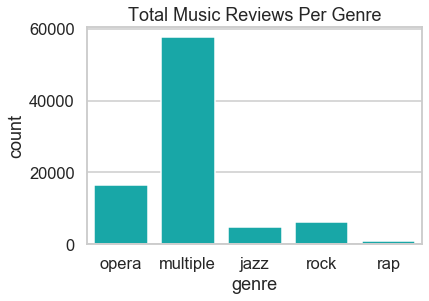

In [58]:
# Number of articles per genre
# sns.catplot(x="year", hue="genre", kind="count", data=df_genres)
per_genre = sns.countplot(x="genre", color="c", data=df_genres)
per_genre.set(title="Total Music Reviews Per Genre")
per_genre.figure.savefig("reviews_per_genre_with_overlaps.png")

In [51]:
df_genres_excl = df_genres[df_genres.genre != "multiple"]
print(df_genres_excl.shape)
df_genres_excl.head()

(28283, 6)


,identifier,genre,year,author,word_count,sentence_count
0,20787,opera,1950,BY OUR MUSIC CRITIC,849,42
1,20788,opera,1950,'',367,14
5,20792,opera,1950,'',249,8
10,20797,opera,1950,'',767,21
13,20800,opera,1950,'',853,34


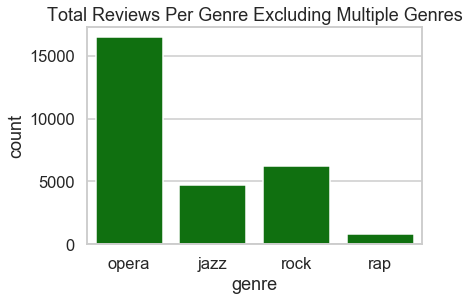

In [64]:
per_genre_excl = sns.countplot(x="genre", color="g", data=df_genres_excl)
per_genre_excl.set(title="Total Reviews Per Genre Excluding Multiple Genres")
per_genre_excl.figure.savefig("reviews_per_genre_without_overlap.png")

In [81]:
# df_genres_grouped = df_genres.groupby("year")
# df_genres_grouped.head()

def getArticlesPerGenrePerYear(df, genre):
    genre_only = df[df.genre == genre]
    genre_year_counts = []
    years = df.year.unique()
    for y in years:
        genre_year_counts += [(genre_only[genre_only.year == y]).shape[0]]
    return genre_year_counts
    
opera_yearly = getArticlesPerGenrePerYear(df_genres, "opera")
jazz_yearly = getArticlesPerGenrePerYear(df_genres, "jazz")
rap_yearly = getArticlesPerGenrePerYear(df_genres, "rap")
rock_yearly = getArticlesPerGenrePerYear(df_genres, "rock")

In [86]:
years = df_genres.year.unique()
df_genre_yearly = pd.DataFrame({"year":years, "opera":opera_yearly, "jazz":jazz_yearly, "rap":rap_yearly, "rock":rock_yearly})
df_genre_yearly.head()

,year,opera,jazz,rap,rock
0,1950,114,4,0,1
1,1951,154,2,0,3
2,1952,156,2,2,6
3,1953,207,4,0,4
4,1954,201,5,0,6


In [103]:
df_genre_yearly_melted = df_genre_yearly.melt(id_vars=["year"], value_vars=["opera", "jazz", "rap", "rock"])
df_genre_yearly_melted.rename(columns={"year":"Year", "variable":"Genre", "value":"Total Articles"}, inplace=True)
df_genre_yearly_melted.head()

,Year,Genre,Total Articles
0,1950,opera,114
1,1951,opera,154
2,1952,opera,156
3,1953,opera,207
4,1954,opera,201


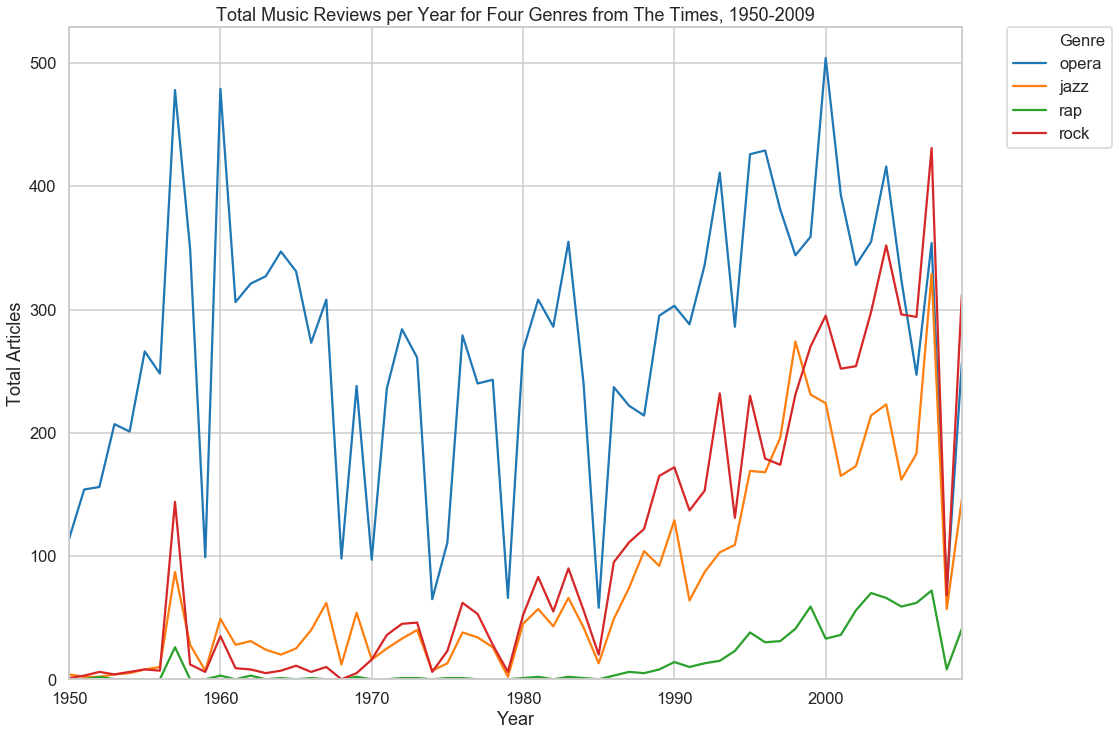

In [112]:
genre_year_viz = plt.figure(figsize=(16,12))
genre_year_viz = sns.lineplot(data=df_genre_yearly_melted, x="Year", y="Total Articles", hue="Genre")
genre_year_viz.set(title="Total Music Reviews per Year for Four Genres from The Times, 1950-2009", ylim=(0), xlim=(1950,2009))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
genre_year_viz.figure.savefig("reviews_per_year_per_genre.png")